# Assignment Day - 20

# Question :
### Three archers – Pat, Jack, and Alex are participating in an archery contest. They are shooting at targets with 10 evenly spaced concentric rings. The rings have score values from 1 through 10 assigned to them, with 10 being the highest. Each participant shoots 6 arrow, scoring the following points:  
 
Pat – 5, 4, 4, 3, 9, 4 Jack – 4, 8, 7, 5, 1, 5 Alex – 9, 9, 8, 10, 4, 10 
 
### Based on the above results we would like to know who the best archer is. In other words our null hypothesis is that the means of all populations are equal. 

In [5]:
import pandas as pd

pat = [5, 4, 4, 3, 9, 4]
jack = [4, 8, 7, 5, 1, 5]
alex = [9, 9, 8, 10, 4, 10]


total_score = pat+jack+alex
total_score

[5, 4, 4, 3, 9, 4, 4, 8, 7, 5, 1, 5, 9, 9, 8, 10, 4, 10]

In [4]:
names = (["pat"]*len(pat) + ["jack"]*len(jack) + ["alex"]*len(alex))


In [8]:
data = pd.DataFrame({"Names":names, "Score":total_score})
data

,Names,Score
0,pat,5
1,pat,4
2,pat,4
3,pat,3
4,pat,9
5,pat,4
6,jack,4
7,jack,8
8,jack,7
9,jack,5


In [9]:
full_score_mean = data["Score"].mean()
full_score_mean

6.055555555555555

In [14]:
pat_sr = pd.Series(pat)
pat_mean = pat_sr.mean()
pad_sum = sum((pat_sr-pat_mean)**2)
pad_sum

22.833333333333332

In [15]:
jack_sr = pd.Series(jack)
jack_mean = jack_sr.mean()
jack_sum = sum((jack_sr-jack_mean)**2)
jack_sum

30.0

In [16]:
alex_sr = pd.Series(alex)
alex_mean = alex_sr.mean()
alex_sum = sum((alex_sr-alex_mean)**2)
alex_sum

25.333333333333332

In [18]:
SSW = pad_sum + jack_sum + alex_sum
SSW

78.16666666666666

In [20]:
score_sr = pd.Series(data["Score"])
score_mean = score_sr.mean()
score_sum = sum((score_sr - score_mean)**2)
score_sum

124.94444444444446

## As we have calculated above SSW which is some of square within groups = 78.16666666666666

## And score_sum which is total sum of squares = 124.94444444444446

## We can easily calculate sum of squares between groups = Total sum of square - SSW

In [22]:
SSB = score_sum - SSW
SSB

46.7777777777778

In [23]:
# Here we will divide SSB by degree of freedom 
# since we have 3 samples so it's degree of freedom will be 3-1 =2

result1 = SSB/2
result1

23.3888888888889

In [25]:
# Here we will divide SSw by degree of freedom 
# since we have 18 observations and 3 groups so degree of freedom will be 18 - 3 =15

result2 = SSW/15
result2

5.21111111111111

In [26]:
F = result1/result2
F

4.488272921108745

## Above as we can see we have manually found the F statistic using anove test

## So Now we want to check that whether our result is coreect

## We will use scipy module to find the f statistic 

In [37]:
import scipy
from scipy import stats

f, p= stats.f_oneway(data[data['Names'] == 'pat'].Score,
                      data[data['Names'] == 'jack'].Score,
                      data[data['Names'] == 'alex'].Score)
print(f)
print(p)

4.4882729211087415
0.029667763955533364


## As above you can see our result is correct

## Now find the critical value to determine whether to reject null hypotheses



In [34]:
critical_value = scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=15)

3.6823203436732412

## Our critical value is lesser than F value and p value is less that 0.05

## So we can reject the null hypotheses which was that means of all population are equal 

## Now the second part of question who is the best archer?

## We will plot the mean of score of each player

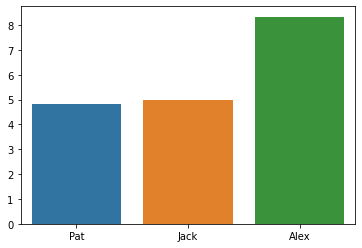

In [39]:
import seaborn as sns

sns.barplot(x = ["Pat", "Jack", "Alex"], y=[pat_mean, jack_mean, alex_mean])

# By observing the above result we can say that Alex is the best player because his average score is greater that jack and pat.